# ЛР №4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import pandas_profiling as pp
import warnings
warnings.simplefilter("ignore")

## Загрузка и первичный анализ

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pp.ProfileReport(data)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Обработка пропусков

In [9]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1, inplace = True)
y = data.Survived
data.drop('Survived', axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [11]:
# Заполняем отсутствующие значения возраста средним возрастом
data['Age'] = data['Age'].replace(0,np.nan)
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Преобразование категориальных признаков в числовые

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# Кодируем признаки Pclass и Embarked в отдельные столбцы
data = pd.get_dummies(data, columns=['Pclass','Embarked'])

In [15]:
# Пол кодируем в 1/0
data['IsMale']=data.Sex.replace({'female':0,'male':1})
data.drop('Sex', axis = 1, inplace = True)

In [16]:
data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,1


## Масштабирование значений

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc2 = StandardScaler()
sc2.fit(data)
sc2_data = sc2.transform(data)

In [19]:
data = pd.DataFrame(sc2_data, columns = data.columns)

In [20]:
data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,-0.592481,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0.737695
1,0.638789,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710,-1.355574
2,-0.284663,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,-1.355574
3,0.407926,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306,-1.355574
4,0.407926,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0.737695


## Разделение выборки

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(712, 11) (712,)
(179, 11) (179,)


## Обучение модели

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=10)

In [25]:
KNeighborsClassifierObj.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [26]:
y_predicted = KNeighborsClassifierObj.predict(X_test)

## Метрики качества

In [27]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, classification_report

In [28]:
accuracy_score(y_test, y_predicted)

0.8435754189944135

In [29]:
balanced_accuracy_score(y_test, y_predicted)

0.8210287846481876

In [30]:
precision_score(y_test, y_predicted)

0.8305084745762712

In [31]:
classification_report(y_test, y_predicted, output_dict = True)

{'0': {'precision': 0.85,
  'recall': 0.9107142857142857,
  'f1-score': 0.8793103448275861,
  'support': 112},
 '1': {'precision': 0.8305084745762712,
  'recall': 0.7313432835820896,
  'f1-score': 0.7777777777777778,
  'support': 67},
 'accuracy': 0.8435754189944135,
 'macro avg': {'precision': 0.8402542372881356,
  'recall': 0.8210287846481876,
  'f1-score': 0.828544061302682,
  'support': 179},
 'weighted avg': {'precision': 0.8427042893665373,
  'recall': 0.8435754189944135,
  'f1-score': 0.8413065348145292,
  'support': 179}}

## Кросс-валидация

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(KNeighborsClassifierObj, 
                         X_train, y_train, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.76653788, 0.77717731, 0.77037103]), 0.7713620744794402)

## Подбор гиперпараметров

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]

In [36]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_weighted')

In [37]:
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [38]:
clf_gs.best_params_

{'n_neighbors': 5}

In [39]:
clf_gs.best_score_

0.78787108888748

In [40]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# ЛР №5

## Логистическая регрессия

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LogRegression = LogisticRegression()

In [43]:
LogRegression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predicted_lr = LogRegression.predict(X_test)

In [45]:
LogRegression.score(X_test,y_test)

0.8044692737430168

In [46]:
classification_report(y_test, y_predicted_lr, output_dict = True)

{'0': {'precision': 0.8598130841121495,
  'recall': 0.8214285714285714,
  'f1-score': 0.8401826484018264,
  'support': 112},
 '1': {'precision': 0.7222222222222222,
  'recall': 0.7761194029850746,
  'f1-score': 0.7482014388489208,
  'support': 67},
 'accuracy': 0.8044692737430168,
 'macro avg': {'precision': 0.7910176531671859,
  'recall': 0.798773987206823,
  'f1-score': 0.7941920436253735,
  'support': 179},
 'weighted avg': {'precision': 0.80831259390754,
  'recall': 0.8044692737430168,
  'f1-score': 0.805753927507722,
  'support': 179}}

## SVM

In [47]:
from sklearn.svm import SVC

In [48]:
SVC_ = SVC()

In [49]:
SVC_.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
y_predicted_svc = SVC_.predict(X_test)
y_predicted_svc

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [51]:
SVC_.score(X_test,y_test)

0.8659217877094972

In [52]:
classification_report(y_test,y_predicted_svc, output_dict= True)

{'0': {'precision': 0.8548387096774194,
  'recall': 0.9464285714285714,
  'f1-score': 0.8983050847457628,
  'support': 112},
 '1': {'precision': 0.8909090909090909,
  'recall': 0.7313432835820896,
  'f1-score': 0.8032786885245902,
  'support': 67},
 'accuracy': 0.8659217877094972,
 'macro avg': {'precision': 0.8728739002932551,
  'recall': 0.8388859275053304,
  'f1-score': 0.8507918866351765,
  'support': 179},
 'weighted avg': {'precision': 0.868339913825587,
  'recall': 0.8659217877094972,
  'f1-score': 0.8627365453780612,
  'support': 179}}

## Дерево решений

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DTClassifier = DecisionTreeClassifier(random_state=1)

In [55]:
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [56]:
y_predicted_DT = DTClassifier.predict(X_test)

In [57]:
DTClassifier.score(X_test,y_test)

0.8100558659217877

In [58]:
classification_report(y_predicted_DT,y_test, output_dict= True)

{'0': {'precision': 0.7589285714285714,
  'recall': 0.9239130434782609,
  'f1-score': 0.8333333333333331,
  'support': 92},
 '1': {'precision': 0.8955223880597015,
  'recall': 0.6896551724137931,
  'f1-score': 0.7792207792207794,
  'support': 87},
 'accuracy': 0.8100558659217877,
 'macro avg': {'precision': 0.8272254797441365,
  'recall': 0.806784107946027,
  'f1-score': 0.8062770562770563,
  'support': 179},
 'weighted avg': {'precision': 0.8253177448749867,
  'recall': 0.8100558659217877,
  'f1-score': 0.8070328182060025,
  'support': 179}}

In [59]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz 

### Визуализация дерева

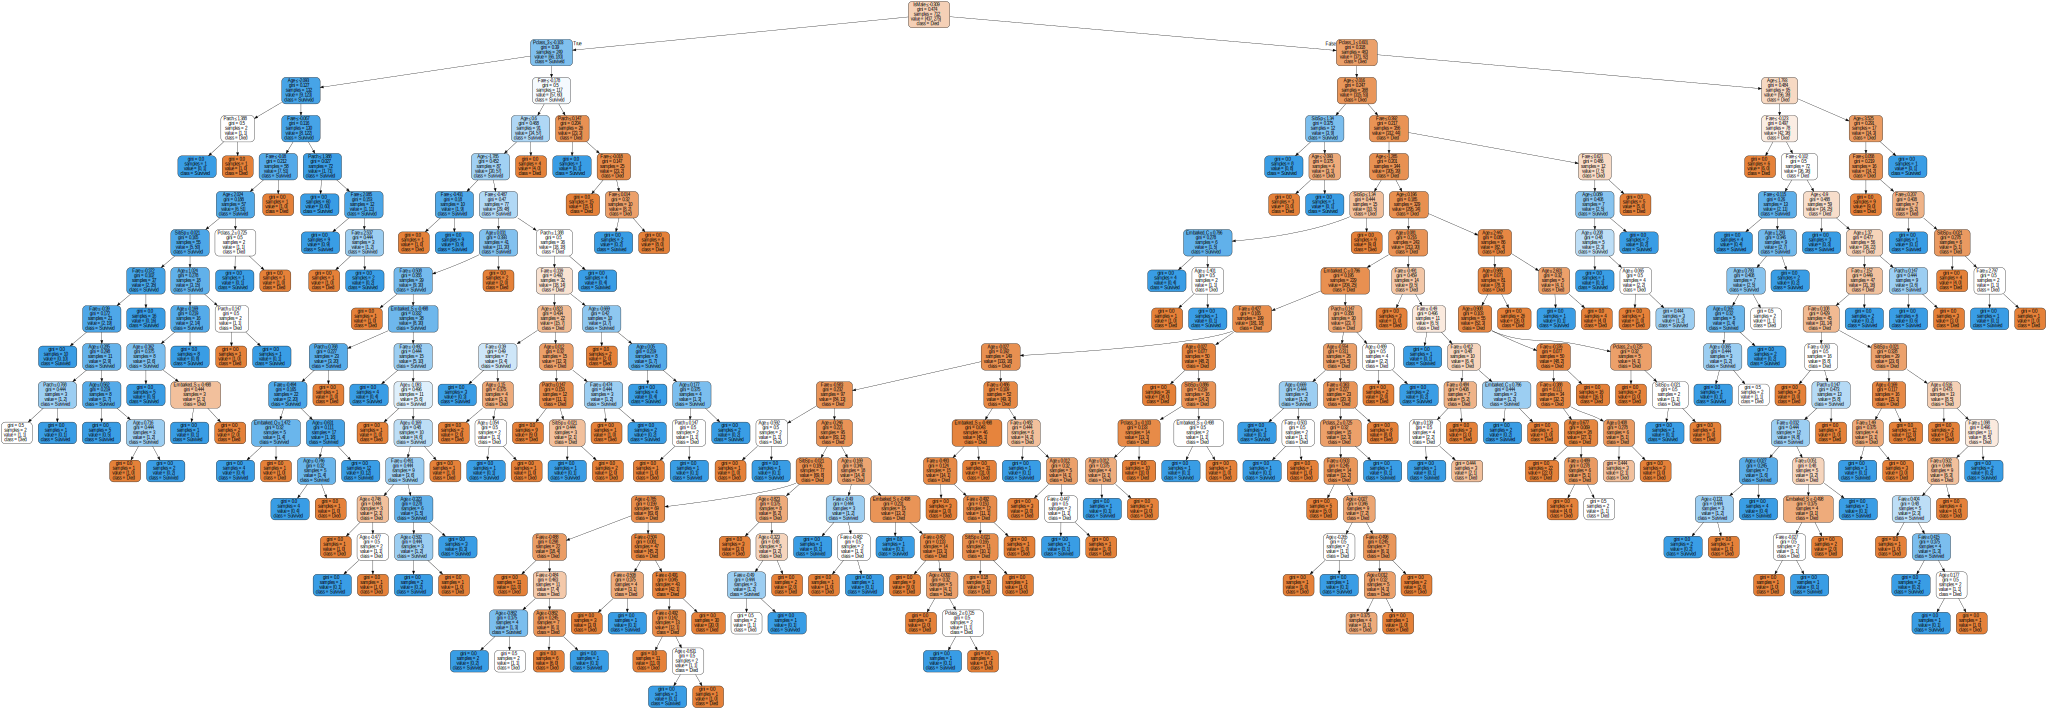

In [60]:
dot_data = export_graphviz(DTClassifier, out_file=None, 
                           feature_names=data.columns, 
                           class_names=('Died','Survived'), 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Важность признаков

In [61]:
from operator import itemgetter
importance = list(zip(data.columns,DTClassifier.feature_importances_))
importance_sort = sorted(importance, key=itemgetter(1), reverse = True)
importance_sort

[('IsMale', 0.2871670739507118),
 ('Fare', 0.24321144496159736),
 ('Age', 0.23672193810675546),
 ('Pclass_3', 0.06826073943367003),
 ('Parch', 0.045973586652106976),
 ('SibSp', 0.0426733601709724),
 ('Pclass_1', 0.03307673997235574),
 ('Embarked_S', 0.016283435200530178),
 ('Pclass_2', 0.01224728102886664),
 ('Embarked_C', 0.009450244136703022),
 ('Embarked_Q', 0.004934156385730447)]

In [62]:
DTClassifier2 = DecisionTreeClassifier(random_state=1)
DTClassifier2.fit(X_train[['Age']],y_train)
DTClassifier2.score(X_test[['Age']],y_test)

0.6145251396648045

In [63]:
DTClassifier2 = DecisionTreeClassifier(random_state=1)
DTClassifier2.fit(X_train[['IsMale']],y_train)
DTClassifier2.score(X_test[['IsMale']],y_test)

0.8212290502793296

In [64]:
y_predicted_DT2 = DTClassifier2.predict(X_test[['IsMale']])
classification_report(y_predicted_DT2,y_test, output_dict= True)

{'0': {'precision': 0.8660714285714286,
  'recall': 0.8508771929824561,
  'f1-score': 0.8584070796460177,
  'support': 114},
 '1': {'precision': 0.746268656716418,
  'recall': 0.7692307692307693,
  'f1-score': 0.7575757575757576,
  'support': 65},
 'accuracy': 0.8212290502793296,
 'macro avg': {'precision': 0.8061700426439233,
  'recall': 0.8100539811066128,
  'f1-score': 0.8079914186108876,
  'support': 179},
 'weighted avg': {'precision': 0.8225676287358101,
  'recall': 0.8212290502793296,
  'f1-score': 0.8217923537545825,
  'support': 179}}

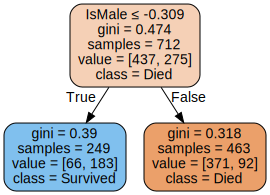

In [65]:
dot_data1 = export_graphviz(DTClassifier2, out_file=None, 
                           feature_names=['IsMale'], 
                           class_names=('Died','Survived'), 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data1)  
graph

## Вывод:  Лучшей из построенных моделей является модель SVM. Дерево, построенное на признаке "IsMale" тоже показывает хорошие результаты.

# ЛР №6

## Случайный лес

In [66]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [67]:
forest = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [68]:
forest.score(X_test,y_test)

0.8491620111731844

In [69]:
y_predicted_forest = forest.predict(X_test)

In [70]:
classification_report(y_predicted_forest,y_test, output_dict=True)

{'0': {'precision': 0.875,
  'recall': 0.8828828828828829,
  'f1-score': 0.8789237668161436,
  'support': 111},
 '1': {'precision': 0.8059701492537313,
  'recall': 0.7941176470588235,
  'f1-score': 0.8,
  'support': 68},
 'accuracy': 0.8491620111731844,
 'macro avg': {'precision': 0.8404850746268657,
  'recall': 0.8385002649708532,
  'f1-score': 0.8394618834080718,
  'support': 179},
 'weighted avg': {'precision': 0.8487763695489036,
  'recall': 0.8491620111731844,
  'f1-score': 0.8489415537239774,
  'support': 179}}

## Градиентный бустинг

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ab1 = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=1)
ab1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [72]:
ab1.score(X_test,y_test)

0.8324022346368715

In [73]:
y_predicted_ab = ab1.predict(X_test)

In [74]:
classification_report(y_predicted_ab,y_test, output_dict=True)

{'0': {'precision': 0.8214285714285714,
  'recall': 0.9019607843137255,
  'f1-score': 0.8598130841121495,
  'support': 102},
 '1': {'precision': 0.8507462686567164,
  'recall': 0.7402597402597403,
  'f1-score': 0.7916666666666667,
  'support': 77},
 'accuracy': 0.8324022346368715,
 'macro avg': {'precision': 0.8360874200426439,
  'recall': 0.8211102622867329,
  'f1-score': 0.8257398753894081,
  'support': 179},
 'weighted avg': {'precision': 0.8340400948172149,
  'recall': 0.8324022346368715,
  'f1-score': 0.8304987034233104,
  'support': 179}}

## Вывод: построенная модель случайного леса дает лучшие результаты по всем метрикам качества модели. 